# Homework 5

## Problem 1

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  σ , say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the  P(signal)  in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  P(data|signal)P(signal) .

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it.

In [71]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import pickle
import math

plt.rcParams["figure.figsize"] = (20,15)

Text(0.5, 0, 'Observed data, $P(d|s)$')

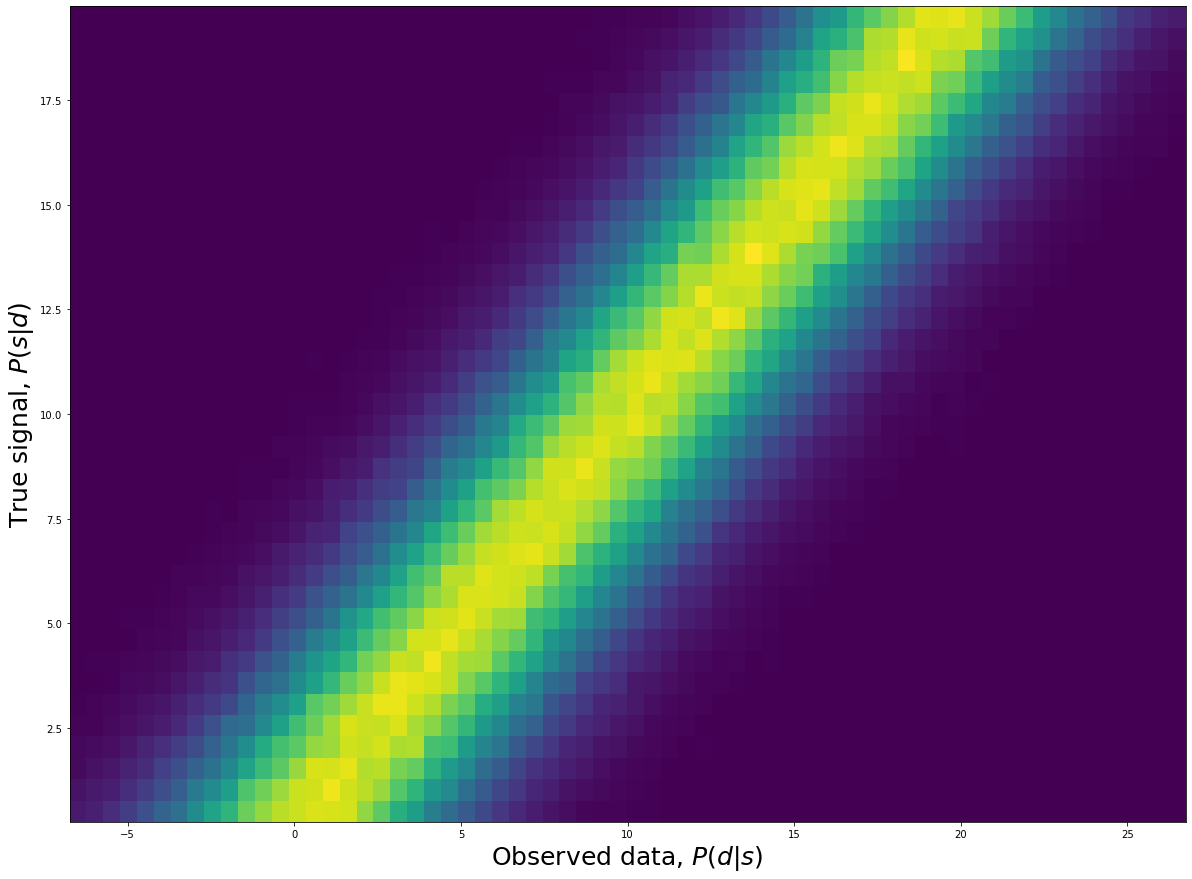

In [72]:
bkgd = stats.norm.rvs(loc=0, scale=3, size = 1000000)
signal = stats.uniform.rvs(loc = 0, scale = 20, size=1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 25)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 25)

### Problem 1b

Select a true injected signal and plot  P(d|s) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

12.82051282051282


Text(0, 0.5, 'Probability')

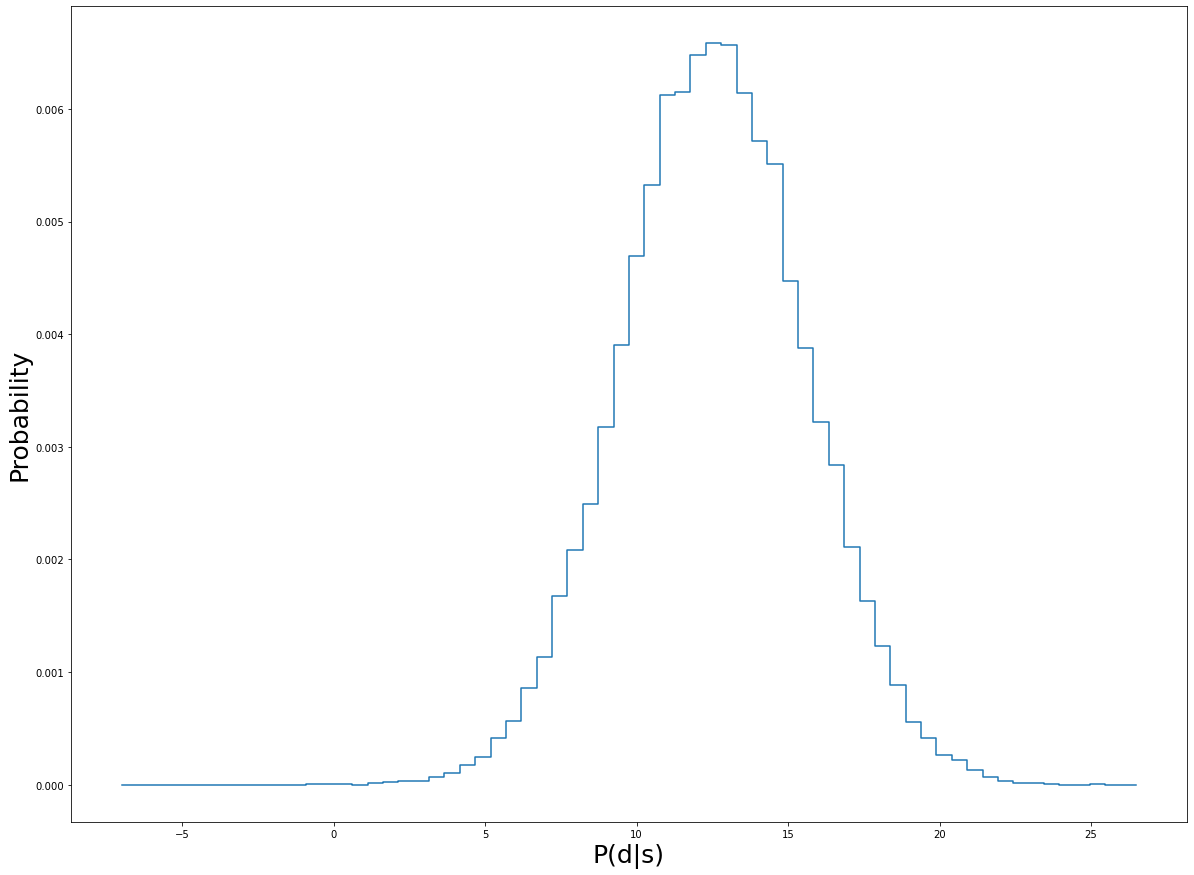

In [73]:
print(signaledges[25])
plt.step(temp[:-1], Psd[:,25])
plt.xlabel('P(d|s)', fontsize=25)
plt.ylabel('Probability', fontsize=25)

This plot show the probability of getting random value that equal to the true signal given that the true signal we injected is 12.8.

### Problem 1c 

Select an observed data value and plot  P(s|d) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

5.686567164179104


Text(0, 0.5, 'Probability')

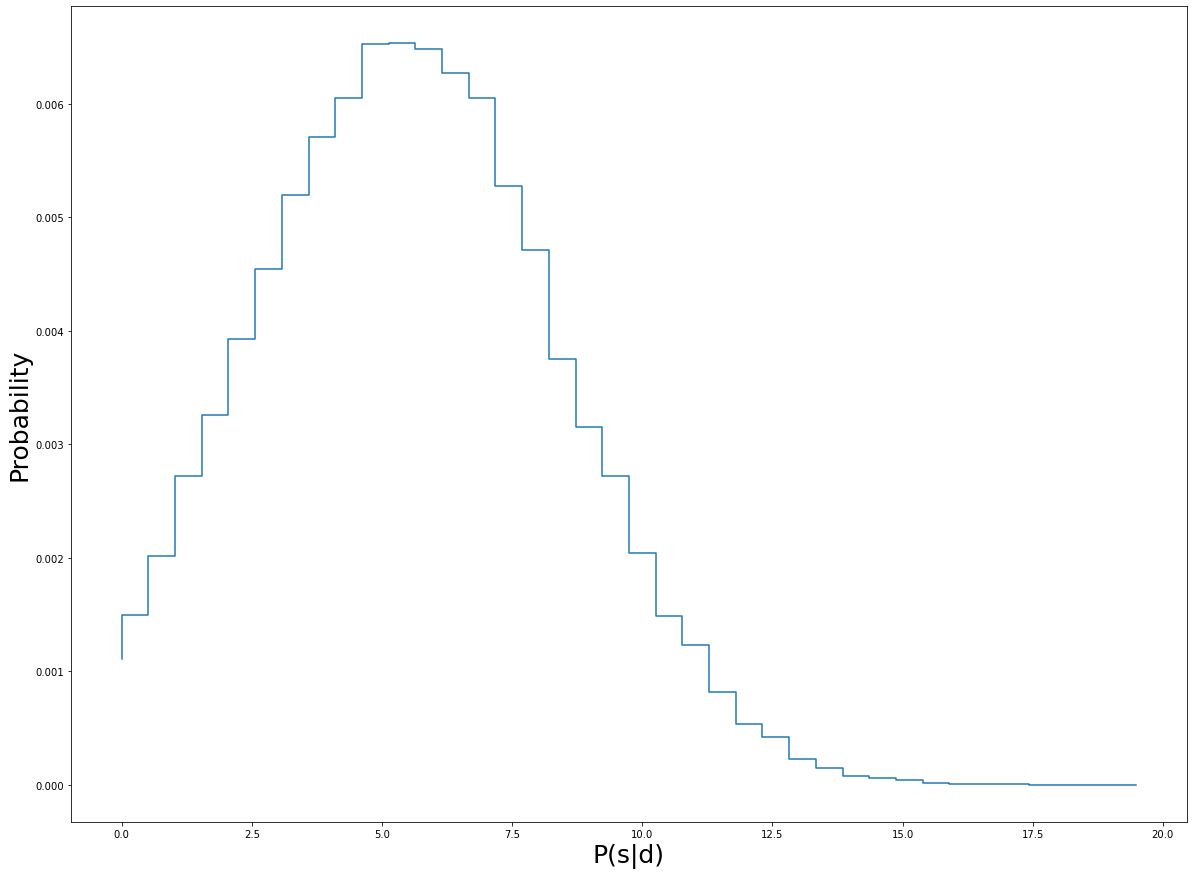

In [74]:
print(dataedges[25])
plt.step(temp2[:-1], Psd[25,:])
plt.xlabel('P(s|d)', fontsize=25)
plt.ylabel('Probability', fontsize=25)

This plot shows the probability of the true signal given that we observed a signal of 5.687.

## Problem 2

Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. Reproduce the graphs above. Lastly overplot the  P(d|s)  and  P(s|d)  plots. Why are they not centered on the same value? Explain carefully.

Text(0.5, 0, 'Observed data, $P(d|s)$')

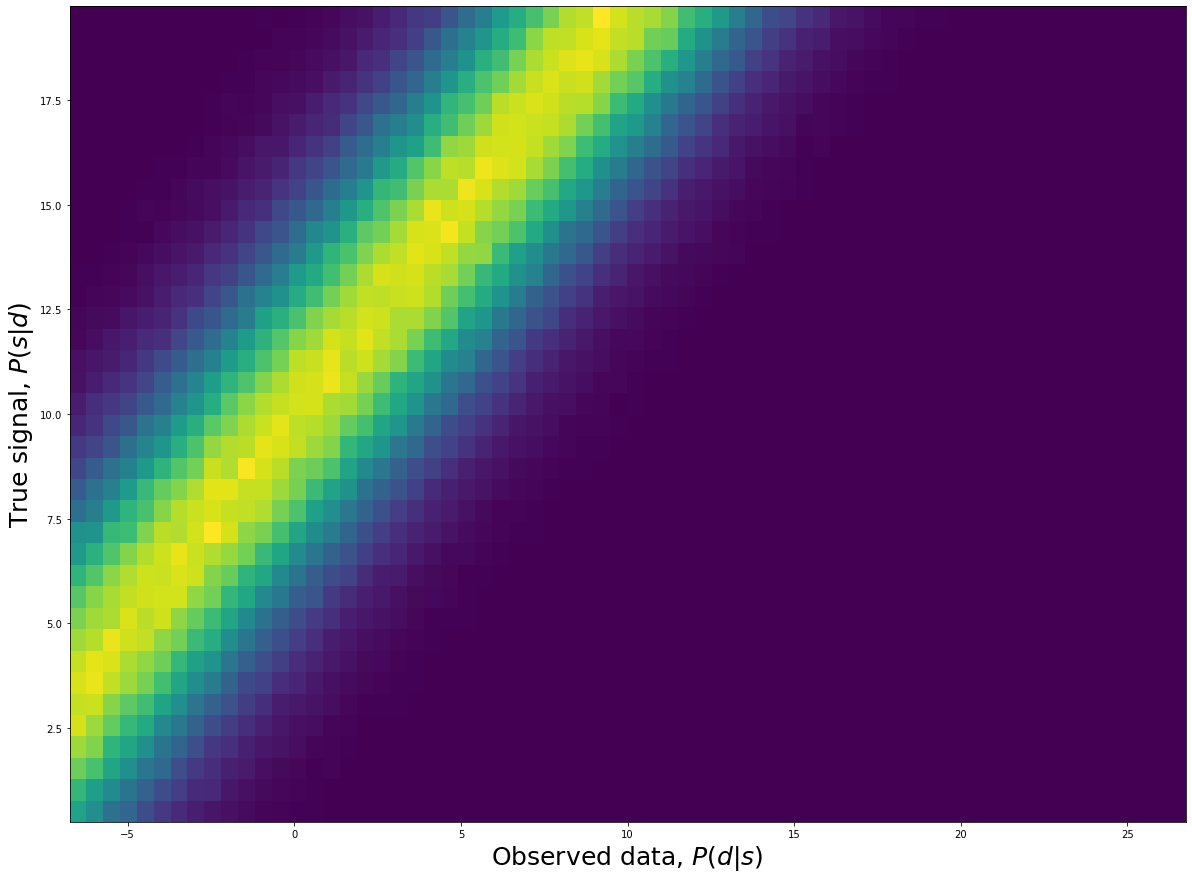

In [75]:
bkgd = stats.norm.rvs(loc=-10, scale=3, size = 1000000)
signal = stats.uniform.rvs(loc = 0, scale = 20, size=1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 25)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 25)

12.82051282051282


Text(0, 0.5, 'Probability')

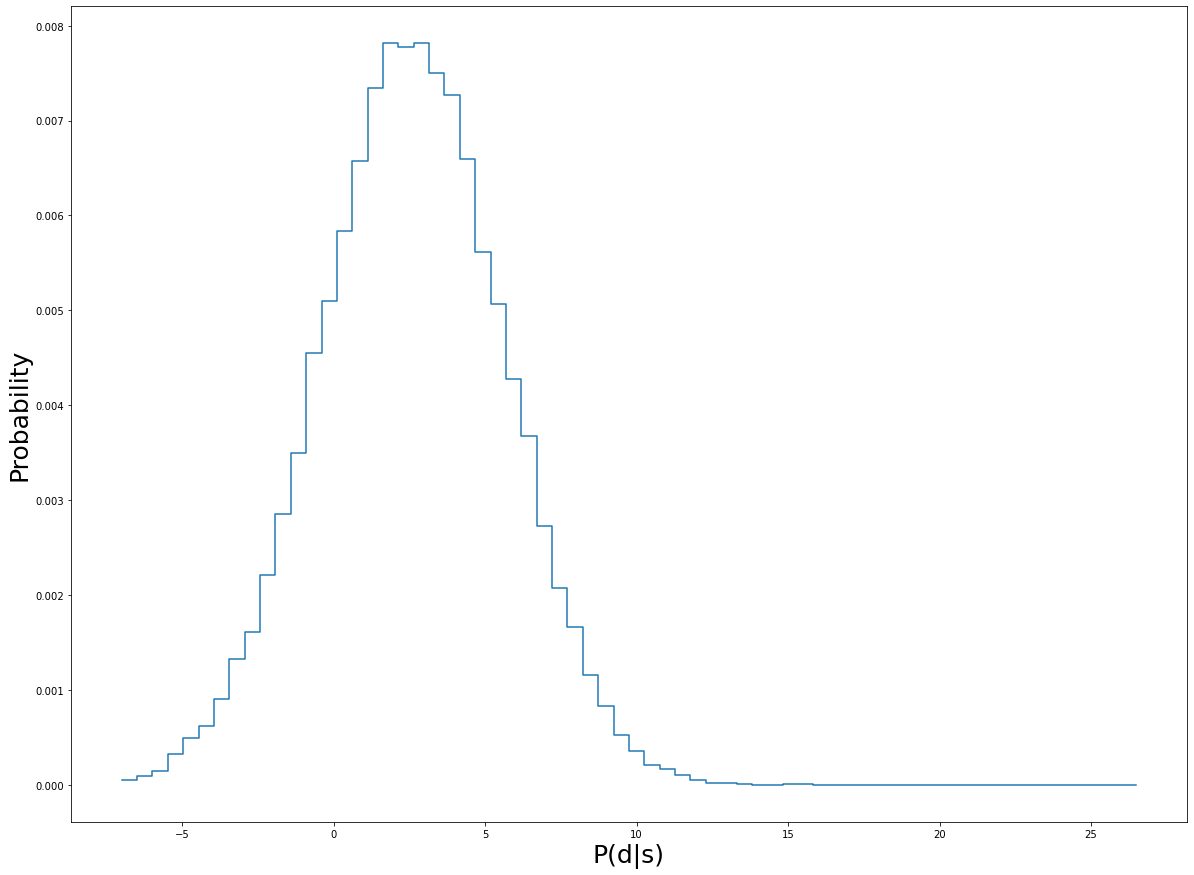

In [76]:
print(signaledges[25])
plt.step(temp[:-1], Psd[:,25])
plt.xlabel('P(d|s)', fontsize=25)
plt.ylabel('Probability', fontsize=25)

5.686567164179104


Text(0, 0.5, 'Probability')

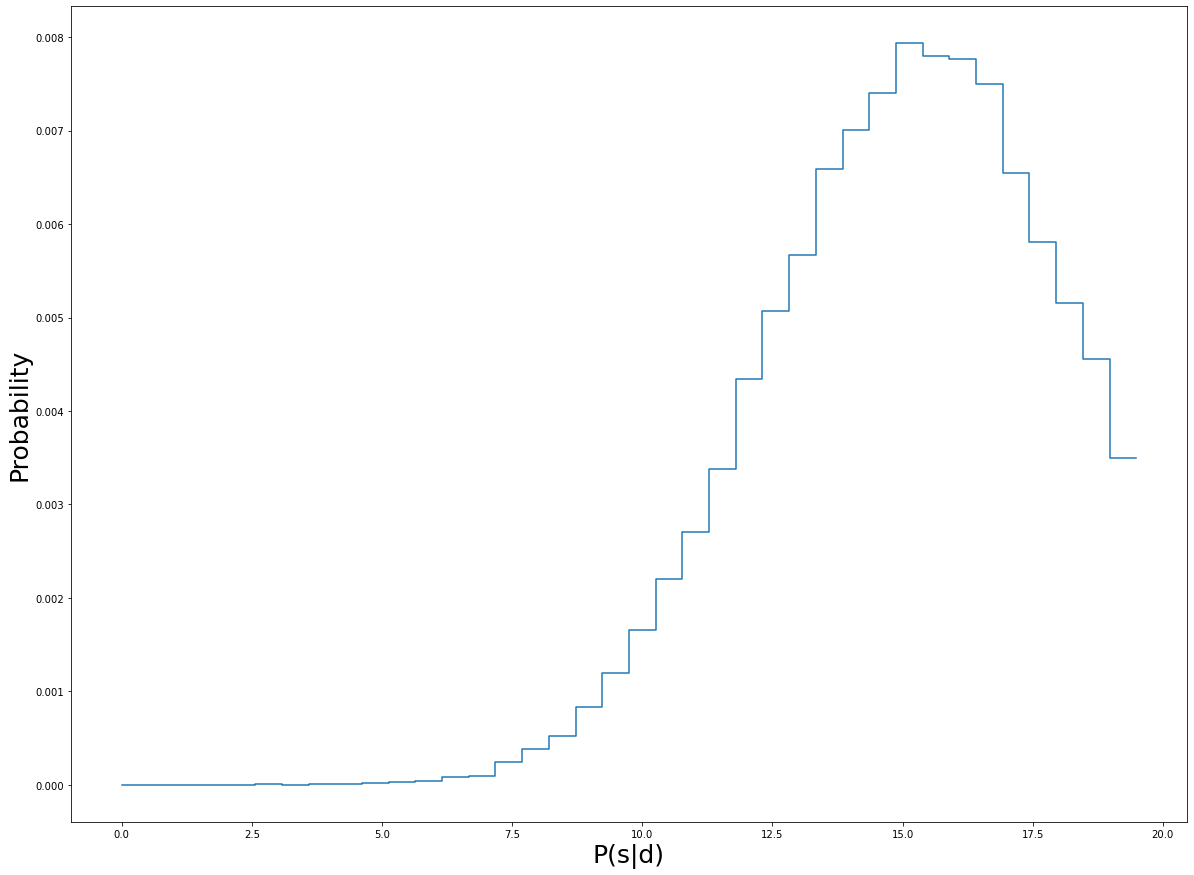

In [77]:
print(dataedges[25])
plt.step(temp2[:-1], Psd[25,:])
plt.xlabel('P(s|d)', fontsize=25)
plt.ylabel('Probability', fontsize=25)

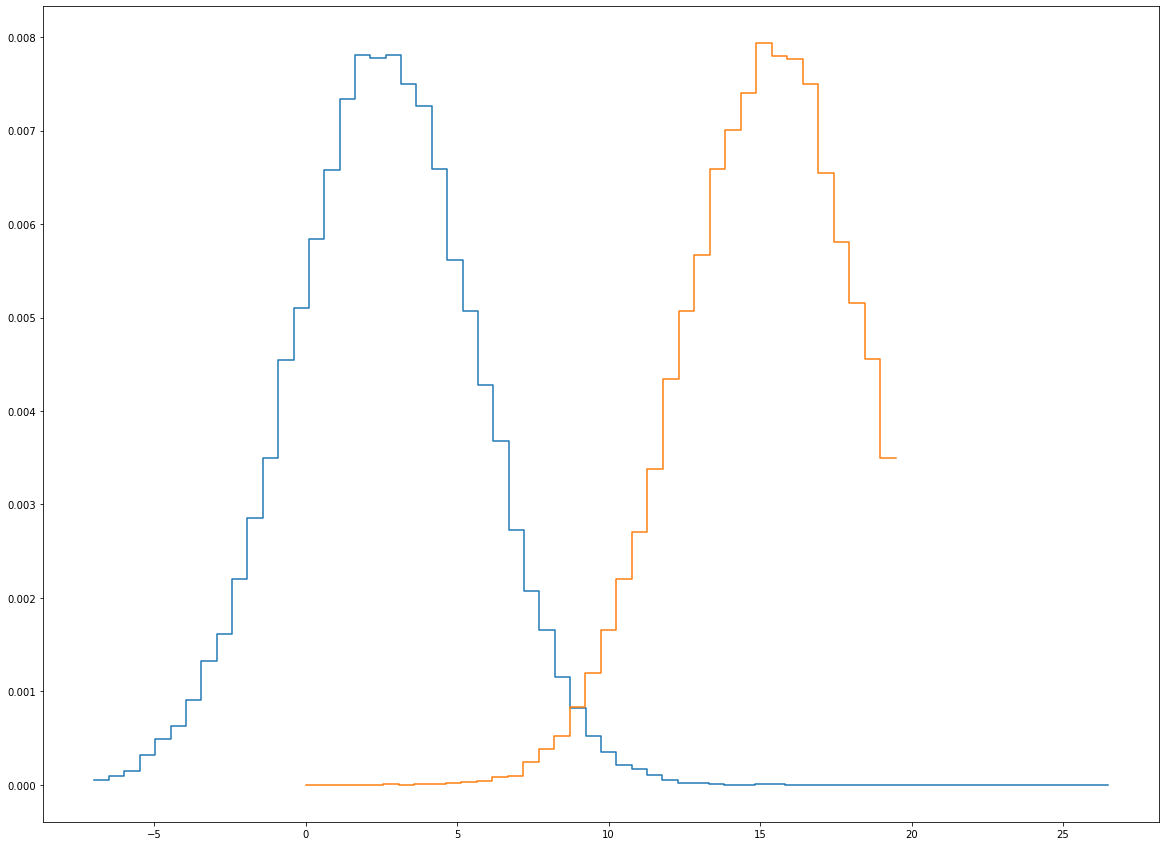

In [78]:
d_s=plt.step(temp[:-1], Psd[:,25])
s_d=plt.step(temp2[:-1],Psd[25,:])
plt.show()

They are not centered on the same value because $P(s|d)$ measure the probality of the real signal is in our given data and $P(d|s)$ measure probability of getting random value that equal to the given true signal. They shows the probability of two different things.